Network parameters:
- Initial weight values
- tanh slope, 1
- Learning parameter, 0.001
- Stopping criterion, stop after n_steps = 1000 or error was considerably small: err = D-y3, (err + previous_err)/2 <= 0.001
- Error measured used in the stop criterion

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [42]:
def rand_vals():
    return rd.random()/5 - 0.1
#     return rd.random()/4 - 0.22

def rand_pattern():
    number = rd.randint(1, 4)
    if number == 1:
        pattern = [0, 0] #False
        D = 0
    elif number == 2:
        pattern = [0, 1] #True
        D = 1
    elif number == 3:
        pattern = [1, 0] #True
        D = 1
    else:
        pattern = [1, 1] #False
        D = 0
        
    return pattern, D

def sequential_pattern(i):
    number = i%4
    
    if number == 0:
        pattern = [0, 0] #False
        D = 0
    elif number == 1:
        pattern = [0, 1] #True
        D = 1
    elif number == 2:
        pattern = [1, 0] #True
        D = 1
    else:
        pattern = [1, 1] #False
        D = 0
        
    return pattern, D

In [58]:
# Learning process
def one_iteration(w11, w12, w10, w21, w22, w20, v11, v12, v10):
    
    # 2. Choose an input pattern, $\mathbf{x}$ and apply it to the input layer
    pattern, D = rand_pattern()
    x1, x2 = pattern[0], pattern[1]

    net1 = w10 + w11*x1 + w12*x2
    net2 = w20 + w21*x1 + w22*x2

    y1 = np.tanh(net1)
    y2 = np.tanh(net2)
    
    # 3. Propagate the activation forward through the weights till the activation reaches the output neurons.
    net3 = v10 + v11*y1 + v12*y2
    y3 = np.tanh(net3)

    # 4. Calculate the $\delta$s for the output layer
    delta3 = (D - y3)*(1-y3**2)
    
    # 5. Calculate the $\delta$s for the hidden layer
    delta1 = delta3*v11*(1-y1**2)
    delta2 = delta3*v12*(1-y2**2)
    
    # 6. Update the weights
    eta = 0.003 # Learning parameter

    v11 += eta*delta3*y1
    v12 += eta*delta3*y2
    v10 += eta*delta3
    w11 += eta*delta1*x1
    w12 += eta*delta1*x2
    w10 += eta*delta1
    w21 += eta*delta2*x1
    w22 += eta*delta2*x2
    w20 += eta*delta2
    
    return [w11, w12, w10, w21, w22, w20, v11, v12, v10, D-y3] #weights and error value

In [59]:
# For historical purposes
def historical_iteration(k, w11, w12, w10, w21, w22, w20, v11, v12, v10):
    
    # 2. Choose an input pattern, $\mathbf{x}$ and apply it to the input layer
    pattern, D = sequential_pattern(k)
    x1, x2 = pattern[0], pattern[1]

    net1 = w10 + w11*x1 + w12*x2
    net2 = w20 + w21*x1 + w22*x2

    y1 = np.tanh(net1)
    y2 = np.tanh(net2)

    # 3. Propagate the activation forward through the weights till the activation reaches the output neurons.
    net3 = v10 + v11*y1 + v12*y2
    y3 = np.tanh(net3)
    
    return [pattern, y3, D, D-y3] # weights and error value

In [60]:
# 1. Initialise the weights to small random numbers.

w10 = rand_vals()
w11 = rand_vals()
w12 = rand_vals()

w20 = rand_vals()
w21 = rand_vals()
w22 = rand_vals()

v10 = rand_vals()
v11 = rand_vals()
v12 = rand_vals()

print("w11, w12, w10, w21, w22, w20, v11, v12, v10")
print(w11,"  ", w12, "  ",w10,"  ",w21,"  ", w22,"  ", w20,"  ", v11,"  ", v12,"  ", v10)

w11, w12, w10, w21, w22, w20, v11, v12, v10
0.06261865486882662    -0.09127359119520431    0.09782783516190424    0.023268803598727128    0.057716635609553896    -0.032474094147108806    0.05646495070351695    -0.09635276549437999    0.07163087385964148


In [61]:
# 2 stopping criteria, stops whenever the first occurs.

learn_steps = []
input_vecs = []
actual_outputs = []
desired_outputs = []
e_ks = []

w11, w12, w10, w21, w22, w20, v11, v12, v10, err = one_iteration(w11, w12, w10, w21, w22, w20, v11, v12, v10)

for i in range(1000): #Stop after N_steps
    if i%10 == 0:
        for k in range(4):
            input_vec, actual_output, desired_output, e_k = historical_iteration(k, w11, w12, w10, w21, w22, w20, v11, v12, v10)
            learn_steps.append(i+k)
            input_vec.append(input_vec)
            actual_outputs.append(actual_output)
            desired_outputs.append(desired_output)
            e_ks.append(e_k)
    
    previous_err = err
    w11, w12, w10, w21, w22, w20, v11, v12, v10, err = one_iteration(w11, w12, w10, w21, w22, w20, v11, v12, v10)
    
    #The sum of the last indices of e_ks
#     if (e_ks[-1]) <= 0.00001: #Stop when the Error at the output is less than Epsilon 
#         print("Error is acceptable. Exit after iteration:", i+1)
#         break

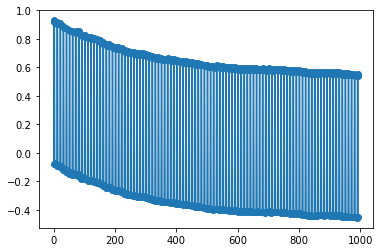

In [62]:
plt.plot(learn_steps, e_ks, marker="o")
plt.show()

# Note how there is no learning! We are always obtaining zeros as output.
And as the ANN "learns", we are actually seeing how it slowly converfes to 0.5. So it is not identifying when a value is True and when it is False.

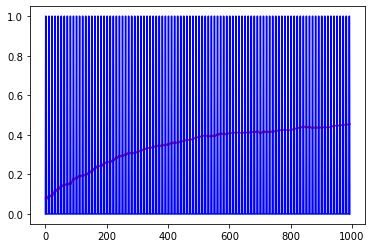

In [63]:
plt.plot(learn_steps, actual_outputs, color= "r")
plt.plot(learn_steps, desired_outputs, color= "b")

In [49]:
desired_outputs

[0, 1, 1, 0, 0, 1, 1, 0]

In [71]:
index = 109
print(actual_outputs[index])
print(desired_outputs[index])

0.30114182071279605
1


Maybe the backpropagation is what is failing here.



# RUN UNTIL HERE!

In [ ]:
w = np.zeros((3,3)) # First layer of weights

# Random value weights for first layer
for i in range(len(w)):
    for j in range(len(w[i])):
        w[i][j] = rand_vals()
        
print(w)

In [ ]:
v = [rd.random()/4+0.38 for i in range(3)]
print(v)

In [ ]:
NET1 = np.matmul(w,pattern1)
y1 = np.tanh(NET1) # https://www.scriptverse.academy/tutorials/python-matrix-multiplication.html

print(y1)

In [ ]:
NET2 = np.matmul(v,y1)
y2 = np.tanh(NET2)

print(y2)

In [ ]:
if y2 < 0.5:
    print("False") # 0
else:
    print("True") # 1

In [ ]:
deltas_output_layer = (D1 - y2)*(1-np.tanh(NET2)**2)
# Careful with matrix multiplication here!
deltas_output_layer